In [1]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier


In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


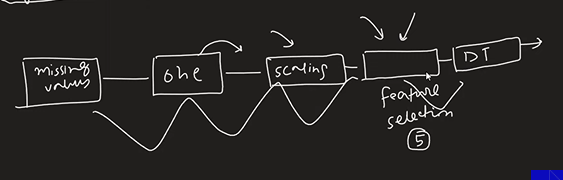

In [9]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket','Cabin'], inplace = True)
# drop the useless columns

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Survived']), 
                                                    df['Survived'],
                                                    test_size = 0.2,
                                                    random_state = 42)

In [14]:
x_train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
104,3,male,37.0,2,0,7.925,S
284,1,male,NaN,0,0,26.000,S
431,3,female,NaN,1,0,16.100,S
90,3,male,29.0,0,0,8.050,S
302,3,male,19.0,0,0,0.000,S


In [19]:
trf1 = ColumnTransformer([
    
    # imputation transformer
    ('impute_age', SimpleImputer(), [2]),
    ('impute_embarked', SimpleImputer(strategy = 'most_frequent'), [6])
], remainder = 'passthrough')

# we can also call the columns in the 3rd paramter of the tuples by their names
# but it is prefered if we use indexes as if we work on numpy arrays then we can use them as welll
    

In [20]:
# one hot encoding

trf2  = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),[1,6])
],remainder = 'passthrough')

In [34]:
#  scaling

trf3 = ColumnTransformer([
('scale', MinMaxScaler(), slice(0,10))
])


In [35]:
# feature selection


trf4 = SelectKBest(score_func = chi2,k = 5)

In [36]:
# train the model

trf5 = DecisionTreeClassifier()

In [37]:
trf5

DecisionTreeClassifier()

# Create Pipeline

In [38]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5)
])
    

In [39]:
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x00000135978639C0>)),
                ('trf5', DecisionTreeClassifier())])

## Pipeline vs make_pipeline

#### pipeline requires naming of stemps , make_pipeline doesnot
#### (same applies to columnTransfomrer vs make_column_transformer)

In [40]:
# Alternate suntax

pip = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [41]:
pip

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x00000135978639C0>)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [42]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [43]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x00000135978639C0>)),
                ('trf5', DecisionTreeClassifier())])

In [45]:
# display pipleine

from sklearn import set_config
set_config(display = 'diagram')

In [46]:
y_pred = pipe.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, y_pred)

0.6256983240223464

In [ ]:
f